In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from surprise import Reader, Dataset, SVD

from surprise.accuracy import rmse, mae
from surprise.model_selection import cross_validate

In [69]:
### read ratings.csv file
ratings = pd.read_csv("ml-latest-small/ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [70]:
## read movies.csv file
movies = pd.read_csv('ml-latest-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [71]:
### drop na value
uni_user = ratings.userId.nunique(dropna=True)
uni_movie = ratings.movieId.nunique(dropna=True)
print("number of user")
print(uni_user)
print("number of movie")
print(uni_movie)

number of user
610
number of movie
9724


In [72]:
## create item user matrix
total_ratings = uni_user*uni_movie
rating_present = ratings.shape[0]

rating_not_provide = total_ratings - rating_present


print("number of rating ")
print(total_ratings)
print("number ratings not provide:")
print(rating_not_provide)
## sparsity of matrix user-item
print("sparsity of matrix user-item")
print(rating_not_provide/total_ratings)

number of rating 
5931640
number ratings not provide:
5830804
sparsity of matrix user-item
0.9830003169443864


Data visalization

In [73]:
rating_cnt = pd.DataFrame(ratings.groupby("rating").size(), columns=['count'])
rating_cnt

,count
rating,
0.5,1370
1.0,2811
1.5,1791
2.0,7551
2.5,5550
3.0,20047
3.5,13136
4.0,26818
4.5,8551


In [74]:
## count all rating(has rating not provide)
rating_cnt = rating_cnt.append(pd.DataFrame({'count':rating_not_provide},index = [0])).sort_index()
rating_cnt

C:\Users\nguoi\AppData\Local\Temp\ipykernel_21340\4280106756.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rating_cnt = rating_cnt.append(pd.DataFrame({'count':rating_not_provide},index = [0])).sort_index()


,count
0.0,5830804
0.5,1370
1.0,2811
1.5,1791
2.0,7551
2.5,5550
3.0,20047
3.5,13136
4.0,26818
4.5,8551


In [75]:
## because number of rating 0 to large then we must use log count 
rating_cnt['log_count'] = np.log(rating_cnt['count'])
rating_cnt

,count,log_count
0.0,5830804,15.578665
0.5,1370,7.222566
1.0,2811,7.941296
1.5,1791,7.490529
2.0,7551,8.929435
2.5,5550,8.621553
3.0,20047,9.905835
3.5,13136,9.483112
4.0,26818,10.196829
4.5,8551,9.053804


frequency of rating like 3 and 4 are more in compare to other ratings


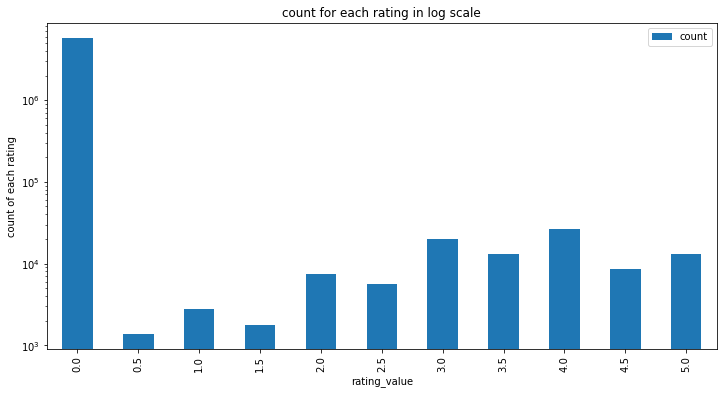

In [76]:
## visualise ratings
rating_cnt_for_vis = rating_cnt
ax = rating_cnt_for_vis.reset_index().rename(columns = {'index':'rating_value'}).plot(
    x='rating_value',
    y='count',
    logy = True,
    kind='bar',
    title='count for each rating in log scale',
    figsize=(12,6)
)
ax.set_xlabel('rating_value')
ax.set_ylabel('count of each rating')
print("frequency of rating like 3 and 4 are more in compare to other ratings")

We has rating in this plot

In [78]:
## drop timestamp
### read ratings.csv file
ratings = pd.read_csv("ml-latest-small/ratings.csv")
ratings.head()
ratings.drop('timestamp', axis=1, inplace=True)
ratings.head()


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [80]:

ratings.isna().sum()

userId     0
movieId    0
rating     0
dtype: int64

### Filter movies with less than 3 ratings

In [82]:
filter_movies = ratings['movieId'].value_counts() > 3
filter_movies = filter_movies[filter_movies].index.tolist()

### Filter users with less than 3 movies rated

In [83]:
filter_users = ratings['userId'].value_counts() > 3
filter_users = filter_users[filter_users].index.tolist()

### Remove rarely rated movies and rarely rating users

In [85]:
print(f'Original shape: {ratings.shape}')
df = ratings[(ratings['movieId'].isin(filter_movies)) & (ratings['userId'].isin(filter_users))]
print(f'New shape: {df.shape}')

Original shape: (100836, 3)
New shape: (92394, 3)


## Create trainning set and test set

### Columns used for training

In [86]:
cols = ['userId', 'movieId', 'rating']

### Create surprise dataset

In [87]:
reader = Reader(rating_scale = (0.5, 5))
data = Dataset.load_from_df(df[cols], reader)

### Create Train-set and Prediction-set 

In [88]:
trainset = data.build_full_trainset()
antiset = trainset.build_anti_testset()

### Creating the model

In [89]:
algo = SVD(n_epochs =25, verbose = True)

### Train Model

In [90]:
cross_validate(algo, data, measures = ['RMSE', 'MAE'], cv=5, verbose= True)
print('>> Training Done')


Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
P

###  Predictions

In [91]:
predictions = algo.test(antiset)


In [92]:
predictions[0]


Prediction(uid=1, iid=318, r_ui=3.529119856267723, est=5, details={'was_impossible': False})

Sau khi thực hiện việc train mô hình ta nhận thấy RMSE đã cái thiện đáng kể.